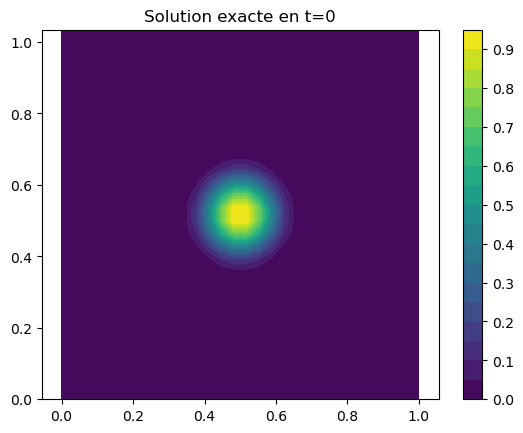

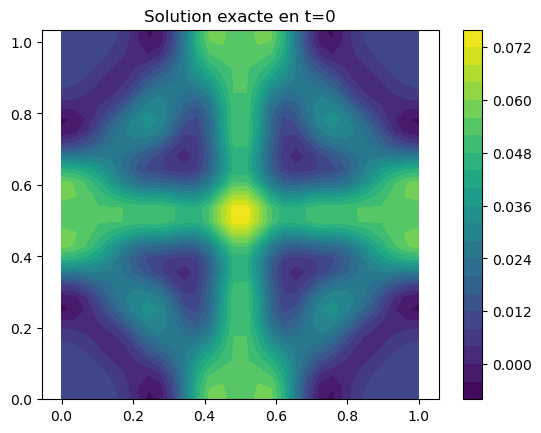

In [1]:
# schéma leapfrog en 2D pour l'équation des ondes
# version pure python

import math
import numpy as np
import matplotlib.pyplot as plt

L = 1.
nx = 30
dx = L/(nx-1)
ny = 30
dy = dx
H = ny * dy
# cfl en x et y
# vitesse du son
c = 1.
cfl = 0.7
dt = cfl * dx / c
bx = c * dt / dx
by = c * dt / dy

r=0.9
gam = (1-r)/(1+r)

def peak(x):
    r2 = x * x
    eps = 0.2
    eps2 = eps * eps
    if r2 / eps2 < 1.0:
        s = (1.0 - r2 / eps2) ** 4
    else:
        s = 0.0
    return s

def exact_sol(xy, t):
    x = xy[0]
    y = xy[1]
    r = math.sqrt((x - 0.5) * (x - 0.5) + (y - 0.5) * (y - 0.5))
    u = peak(r)
    return u

def pl2d(Z):
    x = np.linspace(0, L, nx)
    y = np.linspace(0, H, ny)
    X, Y = np.meshgrid(x, y)
    # Z = np.zeros((nx,ny))
    # for i in range(nx):
    #     for j in range(ny):
    #         Z[i,j] = exact_sol([x[i],y[j]], 0)
    plt.figure()
    plt.contourf(X, Y, Z, 20)
    plt.colorbar()
    plt.axis('equal')
    plt.title('Solution exacte en t=0')
    plt.show()

# tracé de la solution exact_sol en t=0 en 2d avec matplotlib
# respectant l'aspect ratio (le carré reste un carré)
# x = np.linspace(0, L, nx)
# y = np.linspace(0, H, ny)
# X, Y = np.meshgrid(x, y)
# Z = np.zeros((nx,ny))
# for i in range(nx):
#     for j in range(ny):
#         Z[i,j] = exact_sol([x[i],y[j]], 0)
# plt.figure()
# plt.contourf(X, Y, Z, 20)
# plt.colorbar()
# plt.axis('equal')
# plt.title('Solution exacte en t=0')
# plt.show()

def source(xy, t):
    return 0.0

def init_sol(un, unm1):
    for i in range(nx):
        for j in range(ny):
            x = i * dx
            y = j * dy
            un[i,j] = exact_sol([x,y], 0)
            unm1[i,j] = un[i,j]

def leapfrog_step(un, unm1, unp1, t):
    dir = [[-1,0],[1,0],[0,-1],[0,1]]
    a = 1.
    for i in range(nx):
        for j in range(ny):            
            if i==0 or i==nx-1 :
                a = 1/(1+bx*gam)
            if j==0 or j==ny-1 :
                a = 1/(1+by*gam)
            u = np.zeros(4)
            for d in range(4):
                iR = i + dir[d][0]
                jR = j + dir[d][1]
                if iR == -1:
                    iR = 1
                if iR == nx:
                    iR = nx-2
                if jR == -1:
                    jR = 1
                if jR == ny:
                    jR = ny-2
                u[d] = un[iR,jR]
            
            s= source([i*dx,j*dy], t)

            unp1[i][j] = (1 - 2 * a) * unm1[i][j] + \
            2 * a * (1 - bx * bx - by * by) * un[i][j] + \
            a * bx * bx * (u[0] + u[1]) + a * by * by * (u[2] + u[3]) - \
            dt * dt * a * s



unm1 = np.zeros((nx,ny))
un = np.zeros((nx,ny))
unp1 = np.zeros((nx,ny))

init_sol(un, unm1)

pl2d(un)

t = 0.
tmax = 1.

while t < tmax:
    leapfrog_step(un, unm1, unp1, t)
    unm1, un, unp1 = un, unp1, unm1
    t += dt

pl2d(un)